In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# II.2 Variable Aleatoria Discreta

Consideremos que la variable aleatoria $X$ sólo toma valores sobre un conjunto (finito o infinito) numerable de números. Los números Naturales, $\mathbb{N}$, los números Enteros, $\mathbb{Z}$, y los números Racionales, $\mathbb{Q}$, son ejemplos de conjuntos infinitos numerables. Por su parte, los seis números de las caras de un dado constituyen un ejemplo de conjunto numerable finito. 

Consideremos que $x_i$ son los valores que puede tomar la variable aleatoria, donde $i\in I$ se refiere a un índice numerable que recorre $I$ para poder indexar todos los valores. Por tanto $\{X=x_i\}$ se refiere a un suceso elemental cualquiera. 

Los sucesos correspondientes a cada valor de una variable discreta pueden tener probabilidades arbitrarias, que interpretaremos con el símil mecánico de *masa*. Podemos entonces definir una **función de masa de probabilidad (fmp)** que asigna una masa de probabilidad a cada suceso elemental representado por un valor posible de la variable aleatoria discreta

$$p_X(x_i)=P(\{X=x_i\})\qquad i \in I$$

Considerando las propiedades de la probabilidad, se cumple:
$$0\leq p_X(x_i)\leq 1 \qquad \forall i \in I$$
$$\sum_{i \in I} p_X(x_i)=1$$

Por conveniencia podemos considerar que $p_X(x)$ está definida en todo el eje real, tomando **valor cero** fuera de los puntos $x_i$ en los que hay masa de probabilidad.

Supongamos un dado trucado, cuya función de masa de probabilidad se representa en la siguiente tabla:

$$
\begin{array}{c|cccccc|c}
  X & 1 & 2 & 3 & 4 & 5 & 6 &  \\ 
  \hline
  p_X(x_i) & \frac{1}{24} & \frac{5}{24} & \frac{5}{24} & \frac{3}{24} & \frac{4}{24} & \frac{6}{24} & \sum_i p_X(x_i)=1
 \end{array}
$$

Podemos fácilmente obtener las probabilidades de sucesos arbitrarios. Por ejemplo, la probabilidad de que salga $3$ ó $5$ es:
$$
P(X=\{3,5\})=P(\{X=3\}\bigcup \{X=5\}) = p_X(3)+p_X(5)=\frac{9}{24}
$$

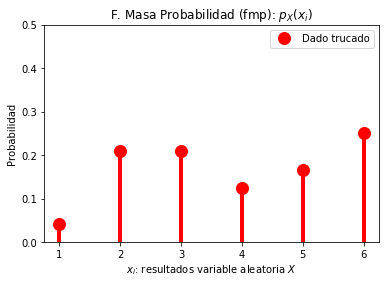

In [2]:
a=1
b=6
xk = np.arange(a,b+1)
pk = (1/24, 5/24, 5/24, 3/24, 4/24, 6/24)
dadoMalo = stats.rv_discrete(name='dadoMalo', values=(xk, pk))
fig, ax = plt.subplots(1, 1)
ax.plot(xk, dadoMalo.pmf(xk), 'ro', ms=12, mec='r', label='Dado trucado')
ax.vlines(xk, 0, dadoMalo.pmf(xk), colors='r', lw=4)
ax.legend(loc='best', frameon=True) 
ax.set_title(r'F. Masa Probabilidad (fmp): $p_X(x_i)$')
ax.set_xlabel(r'$x_i$: resultados variable aleatoria $X$')
ax.set_ylabel('Probabilidad')
ax.set_ylim(0,0.5)
plt.show()

Supongamos ahora, sin pérdida de generalidad, que el índice que numera los posibles valores de la variable aleatoria $X$ es el conjunto de todos los números enteros $\mathbb{Z}$, y que la ordenación es tal que $i<j \iff x_i < x_j$. 

Definimos la **función de probabilidad acumulada (fpa)**, $F_X(x_i)$, como sigue:

$$F_X(x_i)=\sum_{j=-\infty}^{i}p_X(x_j)$$

Adviértase que $F_X(-\infty)=0$, $F_X(\infty)=1$ y que $F_X(x_i)$ es una función *no decreciente* en toda subsucesión de puntos $x_i$.

Por su parte, es fácil ver que $p_X(x_i)=F_X(x_i)-F_X(x_{i-1})$

Calculemos la FAP para nuestro dado trucado, representándola en una tabla junto con la fmp:

$$
\begin{array}{c|cccccccc|c}
  X & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & \\ 
  \hline
  p_X(x_i) & 0 & \frac{1}{24} & \frac{5}{24} & \frac{5}{24} & \frac{3}{24} & \frac{4}{24} & \frac{6}{24} & 0 & \sum_i p_X(x_i)=1 \\
  \hline
  F_X(x_i) & 0 & \frac{1}{24} & \frac{6}{24} & \frac{11}{24} & \frac{14}{24} & \frac{18}{24} & \frac{24}{24} & \frac{24}{24} & \begin{matrix}  
  F_X(x_i\leq 0)=0\\
  F_X(x_i\geq 6)=1 
 \end{matrix}
 \end{array}
$$

Donde, para completar la repesentación hemos añadido los valores $0$ y $7$ que, lógicamente, corresponden a sucesos imposibles (como cualquier otro valor distinto de los primeros seis números naturales).

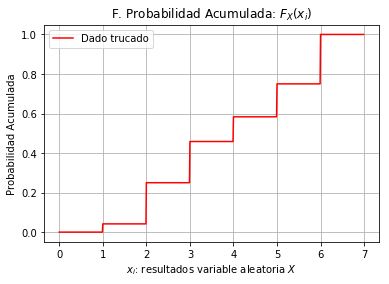

In [3]:
step_x = .01 
x = np.arange(a-1, b+1,step_x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dadoMalo.cdf(x), 'r',label='Dado trucado'), plt.grid()
ax.legend(loc='best', frameon=True), plt.title(r'F. Probabilidad Acumulada: $F_X(x_i)$'),
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad Acumulada')
plt.show()

## Probabilidad condicionada

Considérese un suceso $M$, de probabilidad $P(M)$, del espacio muestral sobre el que se ha definido la variable aleatoria discreta $X$. Definimos la función de masa de probabilidad de $X$ condicionada por $M$ como sigue:

$$p_X(x_i/M) = \frac{P(\{X=x_i\}\bigcap M)}{P(M)} $$

Adviértase que $\sum_i p_X(x_i/M) =1$

Frecuentemente $M$ podrá expresarse por medio de la variable aleatoria $X$, lo que simplifica el cálculo. 

Consideremos los sucesos *Par* e *Impar* en el dado trucado que ya hemos visto y calculemos las funciones de masa de probabilidad condicionadas $p_X(x_i/Par)$ y $p_X(x_i/Impar)$

$$
\begin{array}{c|cccccc|c}
  X & 1 & 2 & 3 & 4 & 5 & 6 &  \\ 
  \hline
  p_X(x_i) & \frac{1}{24} & \frac{5}{24} & \frac{5}{24} & \frac{3}{24} & \frac{4}{24} & \frac{6}{24} & \sum_i p_X(x_i)=1 \\
  \hline
  P(Impar) & \frac{1}{24} & + & \frac{5}{24} & + & \frac{4}{24} &  & P(Impar) = \frac{10}{24} \\
  P(Par)  &  & \frac{5}{24} & + & \frac{3}{24} & + & \frac{6}{24} & P(Par) = \frac{14}{24}\\
  \hline
  p_X(x_i/Impar) & \frac{1}{10} & 0 & \frac{5}{10} & 0 & \frac{4}{10} & 0 & \sum_i p_X(x_i/Impar)=1 \\
  p_X(x_i/Par) & 0 & \frac{5}{14} & 0 & \frac{3}{14} & 0 & \frac{6}{14} & \sum_i p_X(x_i/Par)=1
 \end{array}
$$

In [4]:
P_impar=dadoMalo.pmf(xk)[0::2].sum()
P_par  =dadoMalo.pmf(xk)[1::2].sum()

pk_impar = np.array(pk)*np.array([1,0,1,0,1,0])/P_impar
dadoMalo_impar = stats.rv_discrete(name='dadoMalo', values=(xk, pk_impar))

pk_par = np.array(pk)*np.array([0,1,0,1,0,1])/P_par
dadoMalo_par = stats.rv_discrete(name='dadoMalo', values=(xk, pk_par))

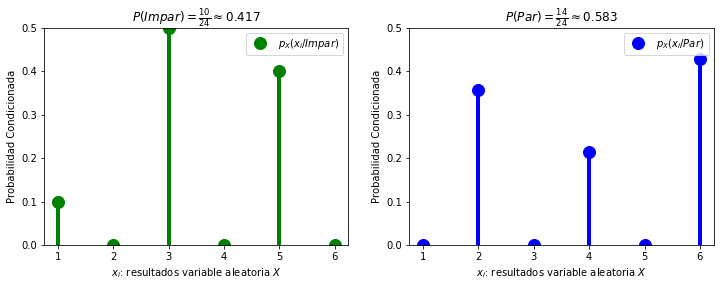

In [5]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)
ax[0].plot(xk, dadoMalo_impar.pmf(xk), 'go', ms=12, mec='g', label=r'$p_X(x_i/Impar)$')
ax[0].vlines(xk, 0, dadoMalo_impar.pmf(xk), colors='g', lw=4)
ax[0].legend(loc='best', frameon=True), 
ax[0].set_title(r'$P(Impar)=\frac{10}{24}\approx 0.417$'),
ax[0].set_xlabel(r'$x_i$: resultados variable aleatoria $X$')
ax[0].set_ylabel('Probabilidad Condicionada')
ax[0].set_ylim(0,0.5)

ax[1].plot(xk, dadoMalo_par.pmf(xk), 'bo', ms=12, mec='b', label=r'$p_X(x_i/Par)$')
ax[1].vlines(xk, 0, dadoMalo_par.pmf(xk), colors='b', lw=4)
ax[1].legend(loc='best', frameon=True),
ax[1].set_title(r'$P(Par)=\frac{14}{24} \approx 0.583$'),
ax[1].set_xlabel(r'$x_i$: resultados variable aleatoria $X$')
ax[1].set_ylabel('Probabilidad Condicionada')
ax[1].set_ylim(0,0.5)
plt.show()

Podemos también definir la probabilidad de un suceso $M$ condicionada por un valor arbitrario $x_i$ de la variable aleatoria $X$. Para ello no hay más que advertir que $\{X=x_i\}$ es un suceso del espacio muestral:

$$P(M/X=x_i)= \frac{P(M \bigcap \{X=x_i\})}{P(\{X=x_i\})}=\frac{P(M \bigcap \{X=x_i\})}{p_X(x_i)}$$

Haremos uso frecuente del abuso de notación $P(M/x_i)\equiv P(M/X=x_i)$.

Adviértase que $P(M/x_i) \neq p_X(x_i/M)$, estando ambas expresiones relacionadas mediante el Teorema de Bayes, como se verá más adelante.

## Teorema de la Probabilidad Total

Consideremos una partición del espacio muestral 
$$
M_j \in \mathscr{P}(\Omega) \, j=1\ldots N\iff  \begin{matrix}
  \bigcup_{j=1}^N M_j = \Omega &  \\
  M_j \cap M_k = \emptyset & j\neq k  
 \end{matrix}
$$
 
y que conocemos las funciones de masa de probabilidad de una variable aleatoria $X$ definida en el mismo condicionadas por todos los sucesos de dicha partición $p_X(x_i/M_j)$, así como las probabilidades de todos los sucesos condicionantes. 

La función de masa de probabilidad total (sin condicionar) de la variable aleatoria $X$ es

$$p_X(x_i) = \sum_{j=1}^N p_X(x_i/M_j)P(M_j)$$

Adviértase que el teorema permite descomponer una función de masa de probabilidad en *mezcla* (*mixture*) de funciones de masa de probabilidad condicionadas, algo que resulta con frecuencia útil. 

En el caso de tener un único suceso $M$, consideramos que el espacio muestral se particiona con él y con su suceso complementario $\overline M$, y que $P(\overline M)=1-P(M)$, resultando:

$$p_X(x_i)=p_X(x_i/M)P(M)+p_X(x_i/\overline M)(1-P(M))$$

En el ejemplo del dado trucado podemos advertir fácilmente que

$$p_X(x_i) = p_X(x_i/Impar)P(Impar) + p_X(x_i/Par)P(Par)$$

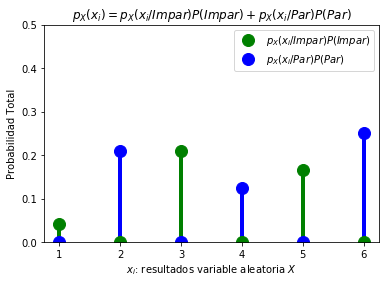

In [6]:
fig, ax = plt.subplots(1, 1)
#fig.set_size_inches(12,4)
ax.plot(xk, dadoMalo_impar.pmf(xk)*P_impar, 'go', ms=12, mec='g', 
        label=r'$p_X(x_i/Impar)P(Impar)$')
ax.vlines(xk, 0, dadoMalo_impar.pmf(xk)*P_impar, colors='g', lw=4)
ax.plot(xk, dadoMalo_par.pmf(xk)*P_par, 'bo', ms=12, mec='b', 
        label=r'$p_X(x_i/Par)P(Par)$')
ax.vlines(xk, 0, dadoMalo_par.pmf(xk)*P_par, colors='b', lw=4)
ax.legend(loc='best', frameon=True), 
ax.set_title(r'$p_X(x_i)=p_X(x_i/Impar)P(Impar)+p_X(x_i/Par)P(Par)$'),
ax.set_xlabel(r'$x_i$: resultados variable aleatoria $X$')
ax.set_ylabel('Probabilidad Total')
ax.set_ylim(0,0.5)
plt.show()

La probabilidad total también puede aplicarse de forma alternativa, si lo que se conocen son las probabilidades un suceso arbitrario $M$ condicionadas por cada uno de los valores posibles de la variable aleatoria $X$, esto es, si se conocen $P(M/x_i)\equiv P(M/X=x_i)$. 

En tal caso, la probabilidad total del suceso $M$ (sin condicionar) es

$$P(M) = \sum_{i=-\infty}^\infty P(M/x_i) p_X(x_i)$$

## Teorema de Bayes

Partiendo de la definición de función de masa de probabilidad condicionada es inmediato obtener el **Teorema de Bayes** (recordar que $P(M/x_i)\equiv P(M/X=x_i)$):

$$p_X(x_i/M) = \frac{P(M/x_i)p_X(x_i)}{P(M)} \iff P(M/x_i) = \frac{p_X(x_i/M)P(M)}{p(x_i)}$$

Con frecuencia, los denominadores de las expresiones anteriores se obtienen mediante el *Teorema de la Probabilidad Total*, pues tan sólo se conocen las probabilidades condicionadas:

$$
\begin{align*}
p_X(x_i/M) &= \frac{P(M/x_i)p_X(x_i)}{\sum_{i=-\infty}^\infty P(M/x_i) p_X(x_i)} \\ 
P(M/x_i) &= \frac{p_X(x_i/M)P(M)}{p_X(x_i/M)P(M)+p_X(x_i/\overline M)(1-P(M))}
\end{align*}
$$

Apliquemos el Teorema de Bayes al ejemplo del dado trucado para obtener, trivialmente, las probabilidades de los sucesos *Par* e *Impar* condicionadas por los valores de la variable aleatoria:
$$
\begin{array}{c|cccccc|c}
  X & 1 & 2 & 3 & 4 & 5 & 6 &  \\ 
  \hline
  p_X(x_i) & \frac{1}{24} & \frac{5}{24} & \frac{5}{24} & \frac{3}{24} & \frac{4}{24} & \frac{6}{24} & \sum_i p_X(x_i)=1 \\
  \hline
  P(Impar) & \frac{1}{24} & + & \frac{5}{24} & + & \frac{4}{24} &  & P(Impar) = \frac{10}{24} \\
  P(Par)  &  & \frac{5}{24} & + & \frac{3}{24} & + & \frac{6}{24} & P(Par) = \frac{14}{24}\\
  \hline
  p_X(x_i/Impar) & \frac{1}{10} & 0 & \frac{5}{10} & 0 & \frac{4}{10} & 0 & \sum_i p_X(x_i/Impar)=1 \\
  p_X(x_i/Par) & 0 & \frac{5}{14} & 0 & \frac{3}{14} & 0 & \frac{6}{14} & \sum_i p_X(x_i/Par)=1\\
  \hline
  P(Impar/x_i) & 1 & 0 & 1 & 0 & 1 & 0 & \sum_i p_X(Impar/x_i)\neq 1\\
  P(Par/x_i) & 0 & 1 & 0 & 1 & 0 & 1 & \sum_i p_X(Par/x_i)\neq 1
 \end{array}
$$

## Función de variable aleatoria

Consideremos una variable aleatoria discreta $X$. Podemos aplicar sobre la misma una función $g$ que devolverá valores aleatorios, al serlo también su variable independiente. Lo representamos como sigue:

$$Y = g(X)$$

Cada valor $x_i$ de $X$ se transformará por la función en un nuevo valor $y_i$ de $Y$. Adviértase que valores distintos $x_i \neq x_j$ pueden dar lugar a valores iguales $y_i = y_j$ con tal que $g(x_i)=g(x_j)$. Por tanto, definimos la función de masa de probabilidad de $Y$ como sigue:

$$p_Y(y_i) = \sum_j p_X(g^{-1}(y_i))
= \sum_{\substack{j \\ g(x_j) = y_i}}p_X(x_j)$$

Donde $j$ indexa las raíces de la ecuación $y_i=g(x_j)$.

Consideremos, por ejemplo, la variable aleatoria $X$ con la siguiente fmp:

$$
\begin{array}{c|cccc|c}
X & -2 & -1 & 0 & 1\\
\hline
p_X(x_i) & \frac{1}{8} & \frac{1}{8} & \frac{1}{2} & \frac{1}{4} & \sum_i p_X(x_i) = 1
\end{array}
$$

Veamos cuál es la fmp de la variable aleatoria $Y = X^2$:

$$
\begin{array}{c|ccc|c}
Y & 0 & 1 & 4\\
\hline
p_Y(y_i) & \frac{1}{2} & \frac{1}{4}+\frac{1}{8} & \frac{1}{8} & \sum_i p_Y(y_i) = 1
\end{array}
$$

Si se desean incluir otros valores de $Y$ en la representación, por ejemplo el $2$ ó el $3$, tendrán masa de probabilidad nulas. 

## Esperanza Matemática y Valor Medio. Momentos

Se define la esperanza matemática de una función $g(X)$ de una variable aleatoria como sigue:

$$E(g(X))=\sum_i g(x_i)p_X(x_i)$$

Es fácil advertir que el operador $E(·)$ es lineal, esto es que

$$E(a_1g_1(X)+a_2g_2(X))=a_1E(g_1(X)) + a_2E(g_2(X))$$

donde $a_1$ y $a_2$ son coeficiente constantes arbitrarios y $g_1$ y $g_2$ son dos funciones. También es evidente que, si $k$ es una constante arbitraria

$$E(k) = k$$

Si $g$ es la función identidad obtenemos el **valor medio** de la variable aleatoria $X$:
$$\eta_X=E(X)=\sum_i x_ip_X(x_i)$$

Es conveniente **reflexionar sobre la relación con la media muestral**, advirtiendo que ambas son medidas de tendencia central.

Adviértase que, como una función de variable aleatoria define una nueva variable aleatoria, $Y=g(X)$, con su propia función de masa de probabilidad, tenemos dos maneras de calcular la esperanza de una función de variable aleatoria:

$$\eta_Y = E(Y)=\sum_i y_ip_Y(y_i) = \sum_i g(x_i)p_X(x_i)$$

Consideremos que la variable aleatoria $X$ tiene valor medio $\eta_X$. Calculemos cuál sera el valor medio de la variable aleatoria $Y = aX+b$, donde $a$ y $b$ son coeficientes constantes.

Aplicando linealidad:

$$E(aX+b) = aE(X)+b = a\eta_X + b$$

Son interesantes los casos particulares:
* Sumar constante, $a=1$: $E(X+b) = \eta_X + b$
* Multiplicar por constante $a$, $b=0$: $E(aX) = a\eta_X$

### Momentos de Segundo Orden: Valor Cuadrático Medio y Varianza

El **valor cuadrático medio**, o momento no centrado de segundo orden, de la variable aleatoria $X$ se define:
$$E(X^2)=\sum_i x_i^2p_X(x_i) \geq 0$$

El valor cuadrático medio es una medida de dispersión respecto del origen, a la que no afecta el signo positivo o negativo de las excursiones (al estar elevada al cuadrado) sino solo la amplitud de las mismas. Por ello siempre es una magnitud positiva, salvo en el caso trivial de que toda la masa de probabilidad se localice en el origen (el valor es determinista e igual a cero).

Es conveniente reflexionar sobre su relación con el estadístico muestral correspondiente.

Consideremos que la variable aleatoria $X$ tiene valor medio $\eta_X$ y valor cuadrático medio $E(X^2)$. Calculemos cuál sera el valor cuadrático medio de la variable aleatoria $Y = aX+b$, donde $a$ y $b$ son coeficientes constantes.

Desarrollando el cuadrado y aplicando linealidad:

$$E((aX+b)^2) = a^2E(X^2)+(2ab\eta_X+b^2)$$

Es interesante el caso de multiplicar por una constante $a$, $b=0$:
$$E((aX)^2) = a^2E(X^2)$$

La **varianza** o momento centrado de segundo orden, se define:
$$\sigma_X^2 \equiv Var(X) = E((X-\eta_X)^2) \geq 0$$

La varianza es una medida de dispersión de los valores de la variable aleatoria en relación a su valor medio. De nuevo, al estar elevada al cuadrado, no importa el signo de las excursiones, sino sólo su amplitud y, por ello, siempre es una magnitud positiva, o trivialmente nula si toda la masa de probabilidad está localizada en el mismo punto (valor determinista).

La raíz cuadrada de la varianza se denomina **desviación típica**, $\sigma_X$.

Desarrollando la definición y aplicando la propiedad de linealidad, se obtiene:
$$\sigma_X^2 = E(X^2) - \eta_X^2 \implies E(X^2) \geq \sigma_X^2$$

Si la variable aleatoria tiene **media nula**: $E(X^2) = \sigma_X^2$

Consideremos ahora que la variable aleatoria $X$ tiene valor medio $\eta_X$, valor cuadrático medio $E(X^2)$ y varianza $\sigma_X^2\equiv Var(X)$. Calculemos cuál sera la varianza de la variable aleatoria $Y = aX+b$, donde $a$ y $b$ son coeficientes constantes.

Aplicando la relación entre valor cuadrático medio, varianza y cuadrado de la media:

$$Var(aX+b) = E((aX+b)^2)-E^2(aX+b)$$

Utilizando las expresiones que ya tenemos:

$$\begin{align*}
E((aX+b)^2) &= a^2E(X^2)+2ab\eta_X+b^2\\
E^2(aX+b) &= (a\eta_X+b)^2 = a^2\eta_X^2+2ab\eta_X+b^2
\end{align*}$$ 

Resultando la varianza:
$$\begin{align*}
Var(aX+b) &= a^2E(X^2)-a^2\eta_X^2=a^2(E(X^2)-\eta_X^2)\\
&=a^2Var(X)
\end{align*}$$

### Tipificación de una Variable Aleatoria

Consideremos que una variable aleatoria $X$ tiene valor medio $\eta_X$ y varianza $\sigma_X$. **Tipificar** la variable quiere decir buscar otra equivalente, pero con **media nula** y **varianza unidad**.

La variable tipificada $\hat X$ la obtenemos aplicando la siguiente función:

$$\hat X = \frac{X-\eta_X}{\sigma_X}$$

De lo visto anteriormente, es inmediato advertir que:

$$\begin{align*}
\eta_{\hat X}= E(\hat X) &= \frac{1}{\sigma_X}\eta_X-\frac{\eta_X}{\sigma_X}&=0 \\
\sigma_{\hat X}^2 = Var(\hat X) &=\frac{1}{\sigma_X^2}\sigma_X^2 &= 1 
\end{align*}$$


### Momentos de orden superior

El momento no centrado de orden $n$ se define como:

$$m_n =E(X^n)=\sum_i x_i^np_X(x_i)$$

El momento centrado de orden $n$:
$$\mu_n =E((X-\eta_X)^n)=\sum_i (x_i-\eta_X)^np_X(x_i)$$

Y el momento tipificado de orden $n$:
$$\gamma_n =E(\left(\frac{X-\eta_X}{\sigma_X}\right)^n)=\sum_i \left(\frac{x_i-\eta_X}{\sigma_X}\right)^np_X(x_i)$$

El momento tipificado de orden 3 corresponde al coeficiente de asimetría, y el de orden 4 al coeficiente de curtosis. Es conveniente reflexionar sobre su relación con sus equivalentes muestrales.

In [7]:
print('Dado trucado:')
print('\t','Media:',dadoMalo.mean())
print('\t','Varianza:',dadoMalo.var())
print('\t','Valor Cuadrático Medio:',dadoMalo.moment(2))

Dado trucado:
	 Media: 3.916666666666667
	 Varianza: 2.576388888888884
	 Valor Cuadrático Medio: 17.916666666666664


### Esperanza Matemática Condicionada

Podemos definir la esperanza matemática de una función $g$ de la variable aleatoria $X$ condicionada por el suceso $M$ como sigue:

$$E(g(X)/M)=\sum_i g(x_i)p_X(x_i/M)$$

Podemos extender con la esperanza condicionada las propiedades y definiciones vistas anteriormente. Por ejemplo:

$$\begin{align*}
\eta_{X/M}=E(X/M)&=\sum_i x_ip_X(x_i/M)\\
E(X^2/M)&=\sum_i x_i^2p_X(x_i/M)\\
\sigma_{X/M}^2 = Var(X/M) &= \sum_i (x_i-\eta_{X/M})^2p_X(x_i/M) = E(X^2/M)-\eta_{X/M}^2
\end{align*}$$

In [8]:
print('Dado trucado - Estadísticos condicionados por ser Impar:')
print('\t','Media condicionada por Impar:',dadoMalo_impar.mean())
print('\t','Varianza condicionada por Impar:',dadoMalo_impar.var())
print('\t','Valor Cuadrático Medio condicionado por Impar:',dadoMalo_impar.moment(2))
print('\n\n')
print('Dado trucado - Estadísticos condicionados por ser Par:')
print('\t','Media condicionada por Par:',dadoMalo_par.mean())
print('\t','Varianza condicionada por Par:',dadoMalo_par.var())
print('\t','Valor Cuadrático Medio condicionado por Par:',dadoMalo_par.moment(2))

Dado trucado - Estadísticos condicionados por ser Impar:
	 Media condicionada por Impar: 3.6000000000000005
	 Varianza condicionada por Impar: 1.639999999999997
	 Valor Cuadrático Medio condicionado por Impar: 14.600000000000001



Dado trucado - Estadísticos condicionados por ser Par:
	 Media condicionada por Par: 4.142857142857142
	 Varianza condicionada por Par: 3.122448979591841
	 Valor Cuadrático Medio condicionado por Par: 20.285714285714285


# Distribuciones de Masa de Probabilidad Habituales

## La Distribución de Bernoulli

Está asociada a la ocurrencia de un evento $A$ con probabilidad $p=P(A)$, construyéndose la variable aleatoria $X$ asignando el valor $1$ cuando $A$ acontece y $0$ cuando no lo hace. Por tanto, la función de masa de probailidad es:

$$
\begin{array}{c|cc|c}
X & 0 & 1\\
\hline
p_X(x_i) & q=1-p & p=P(A) & \sum_i p_X(x_i) = 1
\end{array}
$$

Podemos dar una forma funcional, haciendo además explícita en la definición la dependencia con el parámetro $p$:

$$Bernoulli(p) \equiv p_X(x_i;p)=p^{x_i}(1-p)^{1-x_i} \qquad x_i \in \{0,1\}$$

Podemos calcular fácilmente los principales estadísticos de la distribución:

$$\begin{align*}
\eta_X = E(X) &= 0(1-p)+1p &= p\\
E(X^2) &= 0^2(1-p)+1^2p &= p\\
\sigma_X^2=Var(X) &= E(X^2)-\eta_X^2 = p-p^2 &= p(1-p)
\end{align*}$$


## La Distribución Binomial

Consideremos la repetición de $n$ experimentos de Bernoulli independientes. La distribución binomial modela la probabilidad de que el suceso $A$ acontezca $x_i$ veces en los $n$ intentos:

$$B(n,p)\equiv p_X(x_i; n,p) = \binom{n}{x_i}p^{x_i}(1-p)^{n-x_i} \qquad n \in \mathbb{N} \quad x_i \in \{0,1 \ldots n\}$$

Considerando que una variable aleatoria binomial puede considerarse suma de $n$ variables de Bernoulli independientes, se demuestra (se verá cuando se vean varias variables aleatorias conjuntas) que la media y la varianza son:

$$\begin{align*}
\eta_X = E(X) &= np\\
\sigma_X^2=Var(X) &= np(1-p)
\end{align*}$$

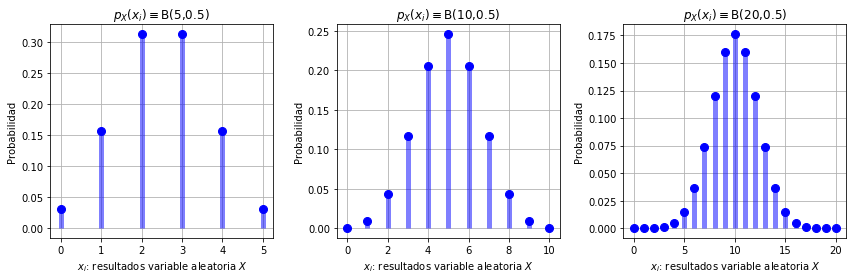

In [29]:
binom = stats.binom

plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 5, .5
plt.subplot(1,3,1)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(5,0.5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 10, .5
plt.subplot(1,3,2)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True) 
plt.title(r'$p_X(x_i) \equiv $B(10,0.5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 20, .5
plt.subplot(1,3,3)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(20,0.5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

plt.tight_layout()

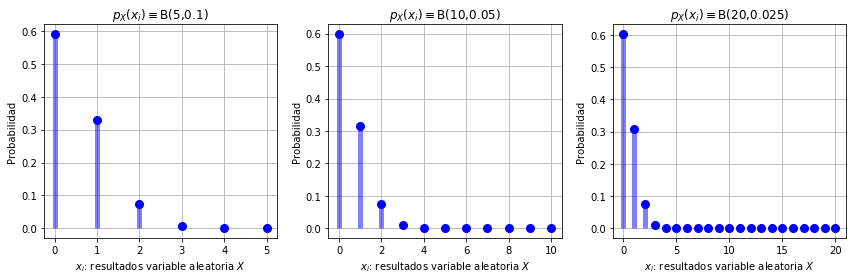

In [32]:
plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 5, .1
plt.subplot(1,3,1)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(5,0.1)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 10, .05
plt.subplot(1,3,2)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True) 
plt.title(r'$p_X(x_i) \equiv $B(10,0.05)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 20, .025
plt.subplot(1,3,3)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(20,0.025)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

plt.tight_layout()

In [39]:
n, p = 5, .5
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 10, .5
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 20, .5
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 5, .1
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 10, .05
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 20, .025
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

B( 5 , 0.5 ):
 	Media:  2.5 	Varianza:  1.25
B( 10 , 0.5 ):
 	Media:  5.0 	Varianza:  2.5
B( 20 , 0.5 ):
 	Media:  10.0 	Varianza:  5.0
B( 5 , 0.1 ):
 	Media:  0.5 	Varianza:  0.45
B( 10 , 0.05 ):
 	Media:  0.5 	Varianza:  0.475
B( 20 , 0.025 ):
 	Media:  0.5 	Varianza:  0.4875


## La Distribución Poisson

La función de masa de probabilidad de la distribución de Poisson es:

$$Pois(\lambda)\equiv p_X(x_i;\lambda) = e^{-\lambda}\frac{\lambda^k}{k!}$$

Esta distribución surge cuando se hacen crecer el número de repeticiones de una distribución Binomial, de modo que la probabilidad de éxito se hace muy pequeña pero el producto de tal probabilidad y el número de repeticiones se mantiene constante:

$$n \rightarrow \infty \begin{cases}
    p \rightarrow 0\\
    np \rightarrow \lambda
  \end{cases} \implies B(n,p) \rightarrow Pois(\lambda)$$
  
El valor medio y la varianza resultan ser: $\eta_X=\sigma_X^2=\lambda$

Los **procesos puntuales de Poisson** son importantes en la práctica. Considérese un intervalo de longitud $\Delta$ en el que se resaltan puntos de forma totalmente aleatoria con una densidad o tasa de llegada de $r$. El promedio de puntos que surgirán en el mismo es $\lambda = r\Delta$. El intervalo podría ser también una porción del plano o del espacio, con una interpretación semejante para los puntos.
* El número de puntos en dos subintervalos disjuntos es independiente, por la aleatoriedad en su surgimiento o llegada.
* El número de puntos del intervalo tiene una distribución $Pois(r\Delta)$
* Como se verá más adelante, si el intervalo es lineal, el periodo de espera hasta el siguiente punto sigue una distribución exponencial


## Distribuciones Multinoulli y Uniforme

Se trata de la distribución genérica de una variable aleatoria discreta que puede tomar $N$ valores posibles. Un ejemplo es el dado trucado visto anteriormente, en el que $N=6$ y cada cara tiene una probabilidad $p_X(x_i)$, con $x_i \in \{1, \ldots 6\}$.

* Un caso particular es cuando $N=2$, $x_i \in \{0,1\}$, que corresponde a la distribución de Bernoulli.
* La **distribución uniforme** es el caso particular en que la variable aleatoria toma valores entre $a$ y $b$, todos con igual probabilidad.  Esto es:

$$U(a,b)\equiv p_X(x_i;a,b)=1/N \qquad a < b \in \mathbb{Z} \qquad N=b-a+1$$  

$$\eta_X = \frac{a+b}{2}$$
$$\sigma_X^2 = \frac{(b-a+1)^2-1}{12}$$
